<a href="https://colab.research.google.com/github/HarshShetye/Machine_Learning_1/blob/main/ML_1_Exp_2_3_60009210068_Harsh_Shetye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **60009210068_HARSH SHETYE_ML1_Expt.2-3**

Dataset Link https://drive.google.com/drive/folders/1O4AAj8ldNk_POMH7uXkC9ytp1Z4j3p0R?usp=sharing

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PlayTennis Dataset

Q1 Implement Decision tree classifier from **scratch** using Dataset By defining Node class and Tree class.

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        # for leaf node
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        # initialize the root of the tree 
        self.root = None
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")   #sets max_info_gain to -ve infinity
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)   #1st stump
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain       
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])   #binary split
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
        
    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
      if not tree:
          tree = self.root
      if tree.value is not None:
          print(tree.value)
      else:
          print(str(data.columns[tree.feature_index]), "=", tree.threshold, "==>","info_gain =", tree.info_gain)
          print("%sleft:" %(indent), end="")
          self.print_tree(tree.left, indent + indent)
          print("%sright:" %(indent), end="")
          self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
data = pd.read_csv("/content/PlayTennis.csv")
data

outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

In [ ]:
dtree.print_tree()

outlook = rainy ==> info_gain = 0.22943684069673975
 left:outlook = overcast ==> info_gain = 0.17095059445466865
  left:yes
  right:windy = False ==> info_gain = 0.9182958340544896
    left:yes
    right:no
 right:temp = cool ==> info_gain = 0.8112781244591328
  left:yes
  right:no


In [ ]:
Y_pred1 = dtree.predict(X_test) 
Y_pred2 = dtree.predict(X_train) 

In [ ]:
print(Y_pred1)

['yes', 'yes', 'yes', 'no', 'no']


In [ ]:
print(Y_pred2)

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes']


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred1)

0.8

In [ ]:
accuracy_score(Y_train, Y_pred2)

1.0

# IRIS Dataset

Q2 Use python libraries to build a decision tree classifier on Dataset. Analyze the results using confusion matrix and accuracy.

Get the Data

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

EDA

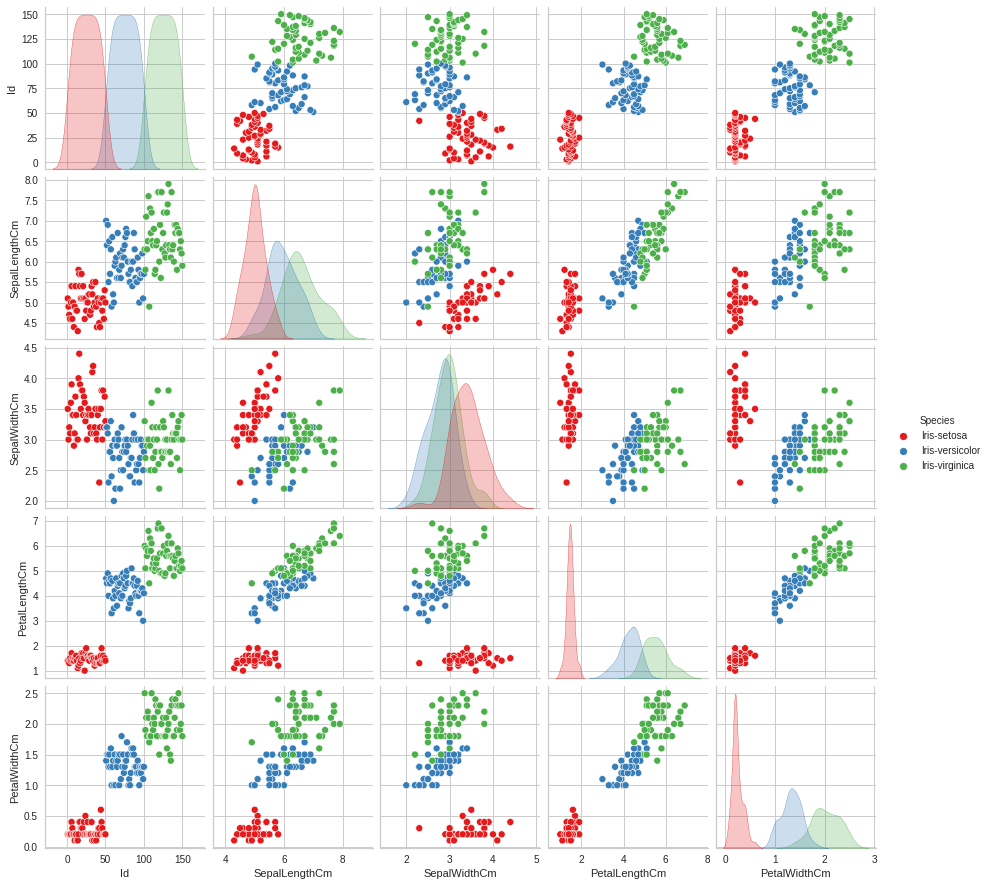

In [ ]:
sns.pairplot(df,hue='Species',palette='Set1')

LabelEncoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])

In [ ]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Species',axis=1)
y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction and Evaluation

In [ ]:
predictions1 = dtree.predict(X_test)
predictions2 = dtree.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Test Data

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print(confusion_matrix(y_test,predictions1))

[[15  0  0]
 [ 0 10  0]
 [ 0  1 19]]


In [ ]:
accuracy_score(y_test,predictions1)

0.9777777777777777

Train Data

In [ ]:
print(classification_report(y_train,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        30

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [ ]:
print(confusion_matrix(y_train,predictions2))

[[35  0  0]
 [ 0 40  0]
 [ 0  0 30]]


In [ ]:
accuracy_score(y_train,predictions2)

1.0

Decision Tree Visualization

In [ ]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

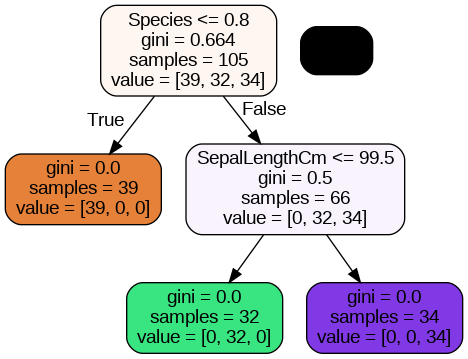

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Checking for Model Overfitting  

In [ ]:
l=[]
for i in range(1,10):
  dtree=DecisionTreeClassifier(max_depth=i)
  dtree.fit(X_train,y_train)
  y_pred=dtree.predict(X_test)
  l.append(accuracy_score(y_test,y_pred))
l 

[0.5555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [ ]:
z=[]
for i in range(1,10):
  dtree=DecisionTreeClassifier(max_depth=i)
  dtree.fit(X_train,y_train)
  y_pred=dtree.predict(X_train)
  z.append(accuracy_score(y_train,y_pred))
z

[0.7142857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

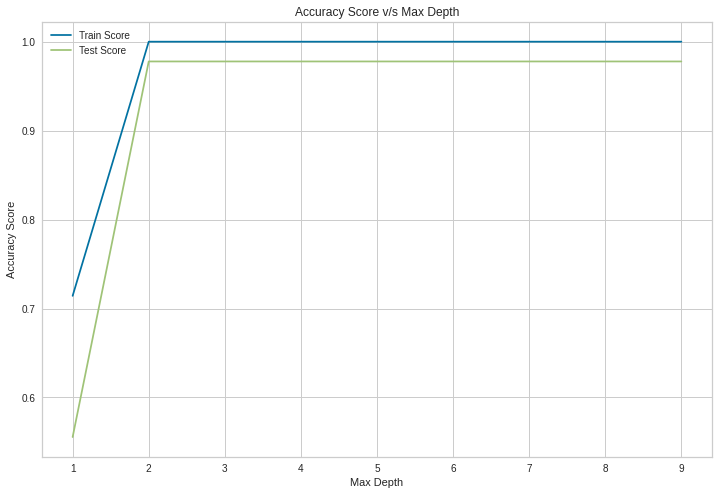

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([i for i in range(1,10)],z,label='Train Score')
plt.plot([i for i in range(1,10)],l,label='Test Score')
plt.title('Accuracy Score v/s Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [ ]:
from yellowbrick.model_selection import validation_curve

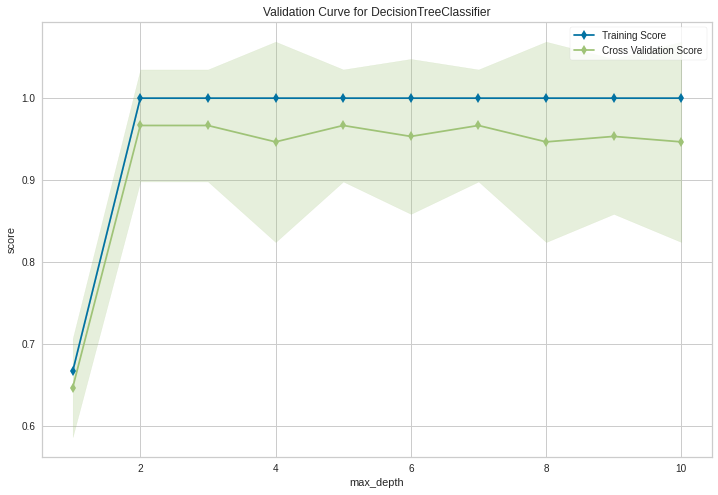

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10, estimator=DecisionTreeClassifier(max_depth=9), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
plt.figure(figsize=(12,8))
print(validation_curve(dtree, X, y, param_name="max_depth", n_jobs=-1, param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

Overfitting starts beyond max depth 2 

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
predictions1 = dtree.predict(X_test)
predictions2 = dtree.predict(X_train)

In [ ]:
print(classification_report(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 10  0]
 [ 0  1 19]]


In [ ]:
accuracy_score(y_test,predictions1)

0.9777777777777777

In [ ]:
print(classification_report(y_train,predictions2))
print(confusion_matrix(y_train,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        30

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

[[35  0  0]
 [ 0 40  0]
 [ 0  0 30]]


In [ ]:
accuracy_score(y_train,predictions2)

1.0

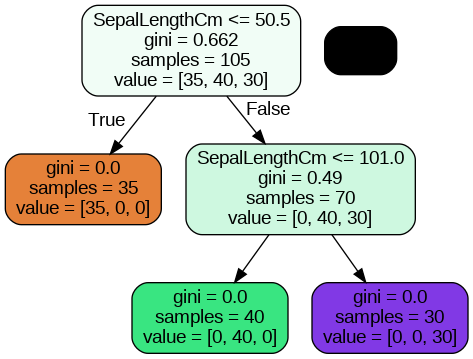

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# BreastCancer Dataset

Q3 Write a code to showoverfitting in the decision tree classifier built using Dataset. Use sklearn and matplotlib.

Load Data

In [ ]:
df = pd.read_csv('/content/Breast_cancer_data.csv')
df

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
564          0  
565          0  
566          0  
567          0  
568          1  

[569 rows x 6 columns]

In [ ]:
df.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

EDA

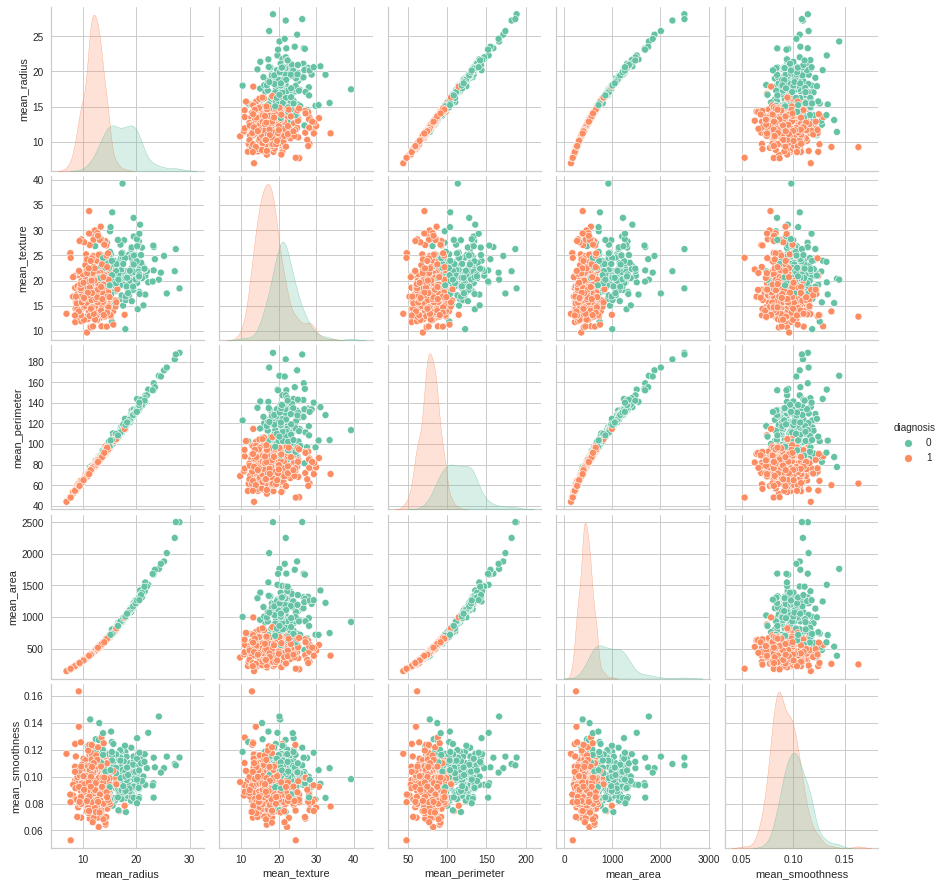

In [ ]:
sns.pairplot(df,hue='diagnosis',palette='Set2')

Train Test Split

In [ ]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions1 = dtree.predict(X_test)
predictions2 = dtree.predict(X_train)

Test Data

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        57
           1       0.97      0.91      0.94       114

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
print(confusion_matrix(y_test,predictions1))

[[ 54   3]
 [ 10 104]]


In [ ]:
accuracy_score(y_test,predictions1)

0.9239766081871345

Train Data

In [ ]:
print(classification_report(y_train,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       243

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [ ]:
print(confusion_matrix(y_train,predictions2))

[[155   0]
 [  0 243]]


In [ ]:
accuracy_score(y_train,predictions2)

1.0

Decision Tree Visualization

In [ ]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']

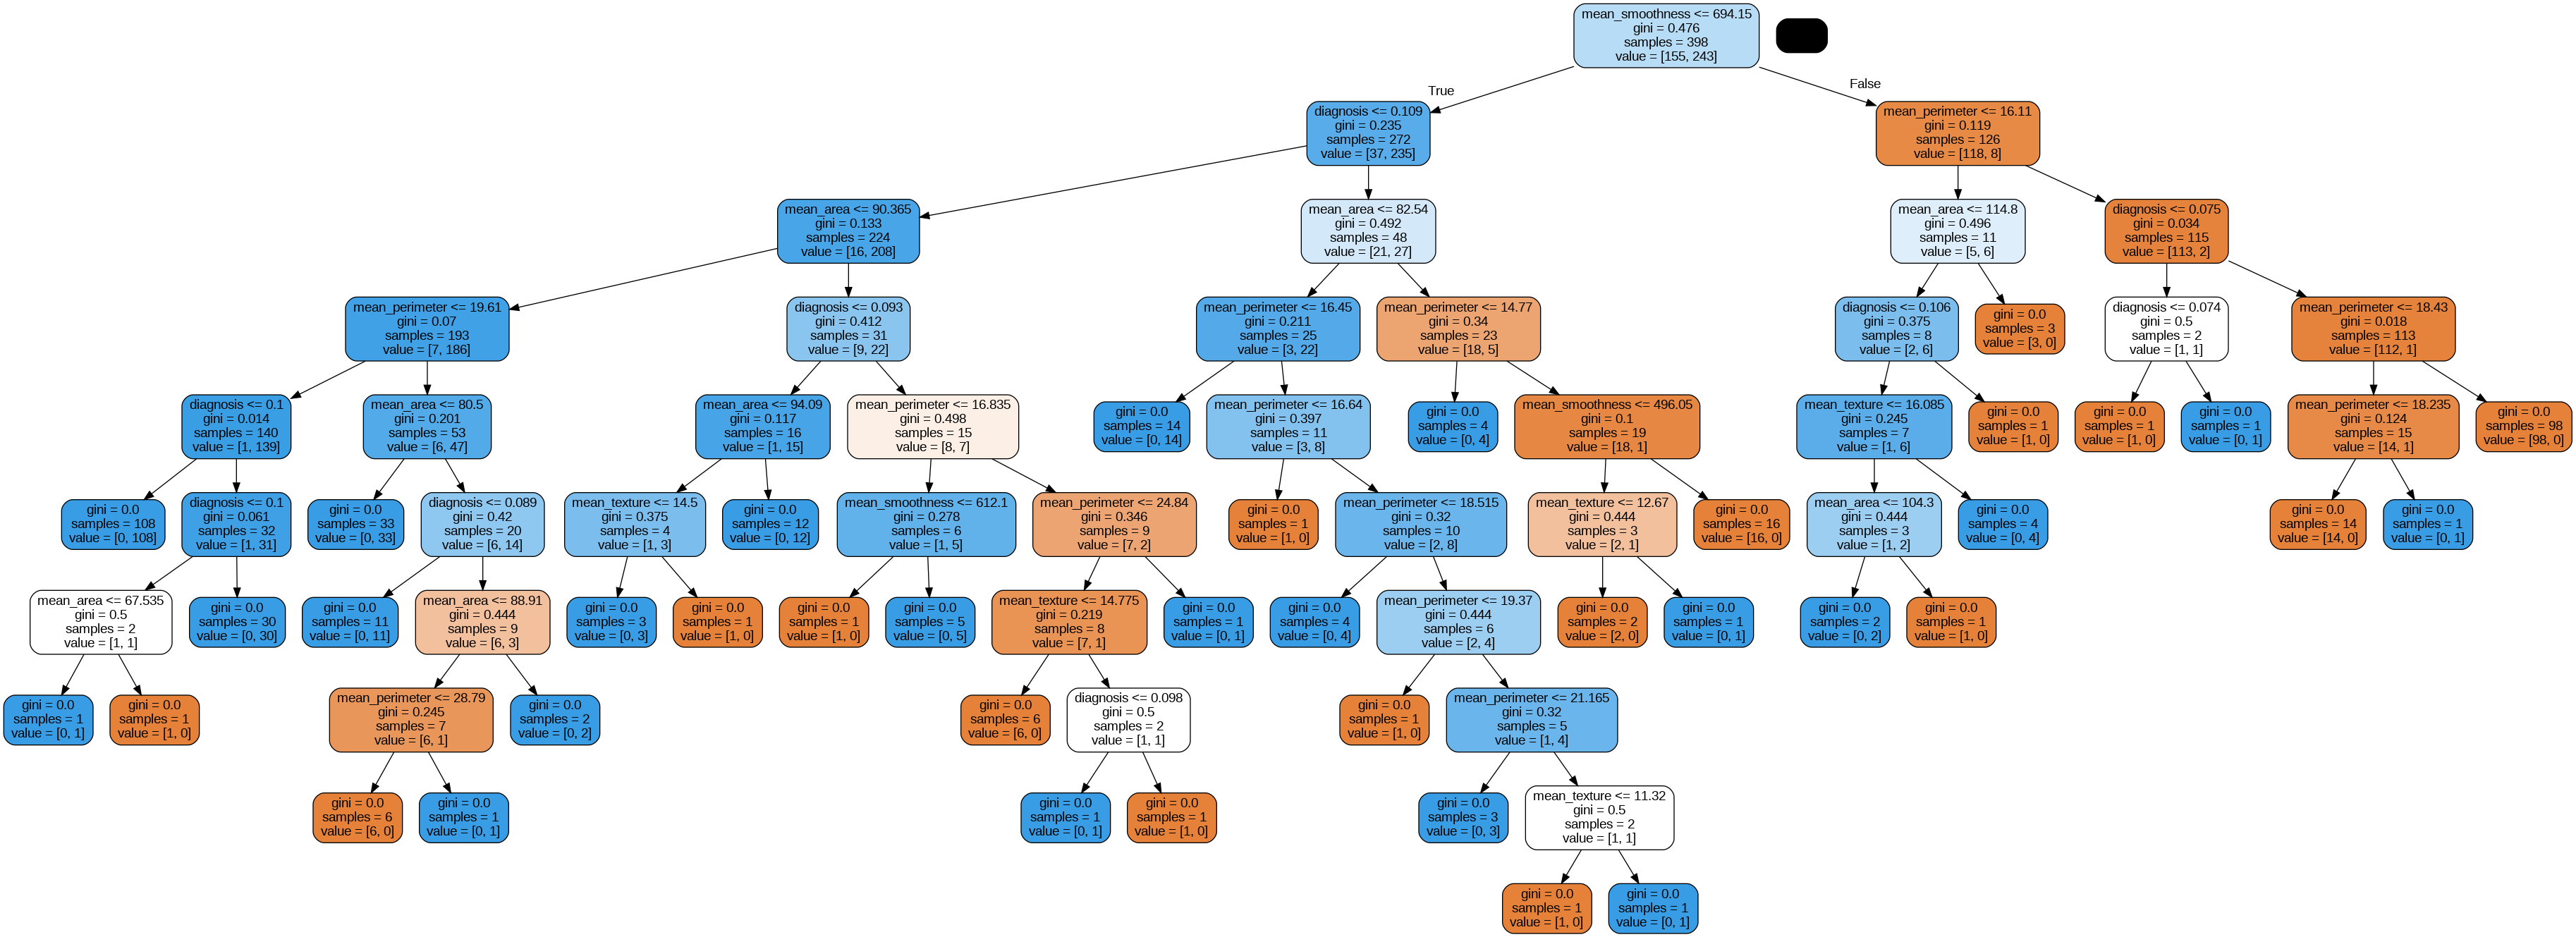

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

Overfitting Check

In [ ]:
l=[]
for i in range(1,13):
  dtree=DecisionTreeClassifier(max_depth=i)
  dtree.fit(X_train,y_train)
  y_pred=dtree.predict(X_test)
  l.append(accuracy_score(y_test,y_pred))
l  

[0.9122807017543859,
 0.9064327485380117,
 0.9005847953216374,
 0.9298245614035088,
 0.9298245614035088,
 0.9181286549707602,
 0.9239766081871345,
 0.9181286549707602,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.935672514619883]

In [ ]:
z=[]
for i in range(1,13):
  dtree=DecisionTreeClassifier(max_depth=i)
  dtree.fit(X_train,y_train)
  y_pred=dtree.predict(X_train)
  z.append(accuracy_score(y_train,y_pred))
z

[0.8869346733668342,
 0.8894472361809045,
 0.9296482412060302,
 0.9472361809045227,
 0.9623115577889447,
 0.9824120603015075,
 0.992462311557789,
 0.9974874371859297,
 1.0,
 1.0,
 1.0,
 1.0]

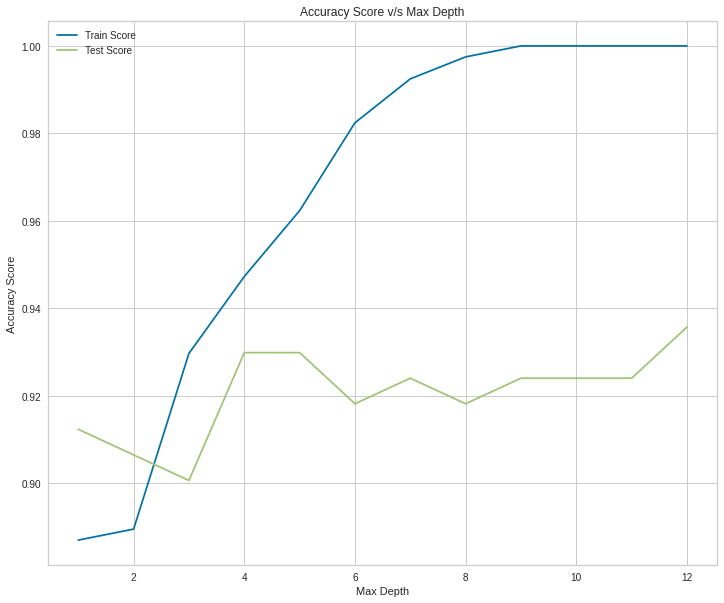

In [ ]:
plt.figure(figsize=(12,10))
plt.plot([i for i in range(1,13)],z,label='Train Score')
plt.plot([i for i in range(1,13)],l,label='Test Score')
plt.title('Accuracy Score v/s Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

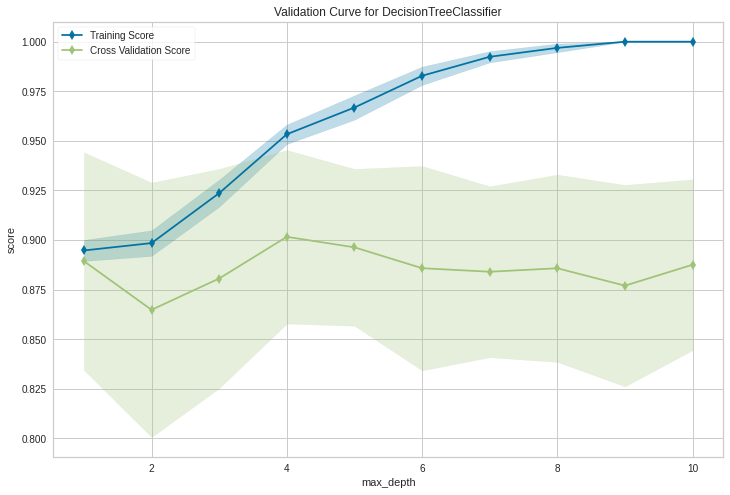

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10, estimator=DecisionTreeClassifier(max_depth=12),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
plt.figure(figsize=(12,8))
print(validation_curve(dtree, X, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

Model Overfits beyond Max_depth 2

Post-Pruning

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(X_train,y_train)

In [ ]:
predictions1 = dtree.predict(X_test)
predictions2 = dtree.predict(X_train)

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        57
           1       0.88      1.00      0.93       114

    accuracy                           0.91       171
   macro avg       0.94      0.86      0.89       171
weighted avg       0.92      0.91      0.90       171



In [ ]:
print(confusion_matrix(y_test,predictions1))

[[ 41  16]
 [  0 114]]


In [ ]:
accuracy_score(y_test,predictions1)

0.9064327485380117

In [ ]:
print(classification_report(y_train,predictions2))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       155
           1       0.85      0.99      0.92       243

    accuracy                           0.89       398
   macro avg       0.92      0.86      0.88       398
weighted avg       0.90      0.89      0.89       398



In [ ]:
print(confusion_matrix(y_train,predictions2))

[[113  42]
 [  2 241]]


In [ ]:
accuracy_score(y_train,predictions2)

0.8894472361809045

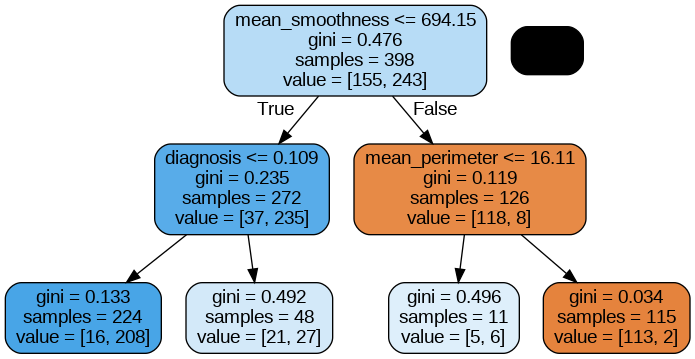

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# CarPrediction Dataset

Q4 Implement Decision tree regressor on Dataset.

In [ ]:
df = pd.read_csv('/content/carprediction.csv')
df

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Data Preprocessing

In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df.fillna((df.mean()), inplace=True)
df.fillna('', inplace=True)

<ipython-input-213-ce55f87ad0ae>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna((df.mean()), inplace=True)


In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
df

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [ ]:
string_list=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

Distplot

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSRP', ylabel='Density'>

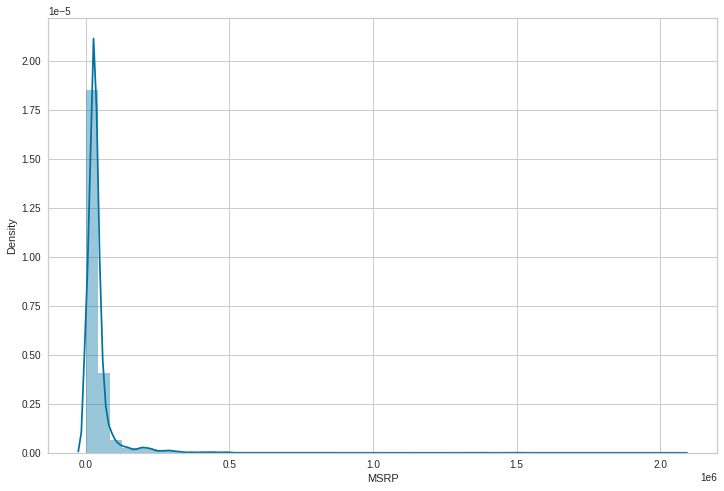

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['MSRP'])

Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df[string_list] = df[string_list].apply(label_encoder.fit_transform)

In [ ]:
df

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0         4      1  2011                 9      335.0               6.0   
1         4      0  2011                 9      300.0               6.0   
2         4      0  2011                 9      300.0               6.0   
3         4      0  2011                 9      230.0               6.0   
4         4      0  2011                 9      230.0               6.0   
...     ...    ...   ...               ...        ...               ...   
11909     0    901  2012                 9      300.0               6.0   
11910     0    901  2012                 9      300.0               6.0   
11911     0    901  2012                 9      300.0               6.0   
11912     0    901  2013                 8      300.0               6.0   
11913    25    902  2006                10      221.0               6.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                      3              3              2.0               39   
1                      3              3              2.0               68   
2                      3              3              2.0               65   
3                      3              3              2.0               68   
4                      3              3              2.0               64   
...                  ...            ...              ...              ...   
11909                  1              0              4.0               14   
11910                  1              0              4.0               14   
11911                  1              0              4.0               14   
11912                  1              0              4.0               14   
11913                  1              2              4.0               64   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0                 0              8           26        19        3916  46135  
1                 0              6           28        19        3916  40650  
2                 0              8           28        20        3916  36350  
3                 0              8           28        18        3916  29450  
4                 0              6           28        18        3916  34500  
...             ...            ...          ...       ...         ...    ...  
11909             2              2           23        16         204  46120  
11910             2              2           23        16         204  56670  
11911             2              2           23        16         204  50620  
11912             2              2           23        16         204  50920  
11913             2             14           26        17          61  28995  

[11914 rows x 16 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('MSRP',axis=1)
y = df['MSRP']

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Importing Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

Predictions

In [ ]:
predictions1 = reg.predict(X_test)
predictions2 = reg.predict(X_train)

Residual Histogram

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


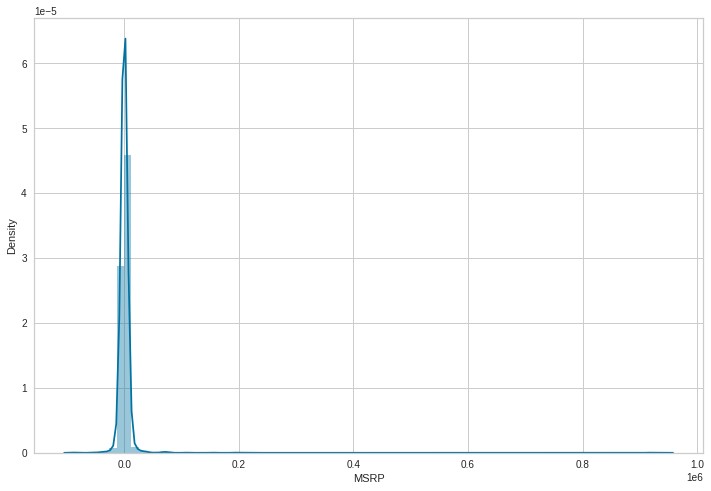

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-predictions1),bins=80);

Model Evaluation

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 3919.0439886950653
MSE: 562340436.454397
RMSE: 23713.718317766976


In [ ]:
print(reg.score(X_train,predictions2))
print(reg.score(X_test,predictions1))

0.9993425835578015
0.9845821990701644


Decision Tree Visualization

In [ ]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[0:-1])
features

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity']

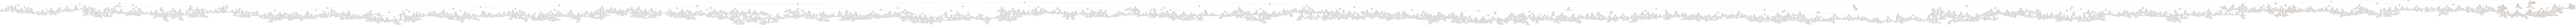

In [ ]:
dot_data = StringIO()  
export_graphviz(reg, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Validation Curve

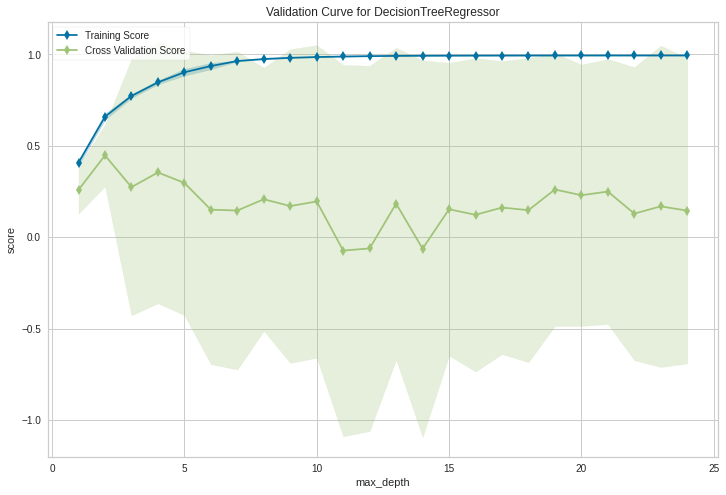

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>,
                cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]))


In [ ]:
plt.figure(figsize=(12,8))
print(validation_curve(reg, X, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 25), cv=10))

Overfitting starts at depth 13

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=13)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13)

In [ ]:
predictions1 = reg.predict(X_test)
predictions2 = reg.predict(X_train)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 3087.9265392686407
MSE: 44736388.09483769
RMSE: 6688.526601190855


Errors have reduced significantly Post Pruning

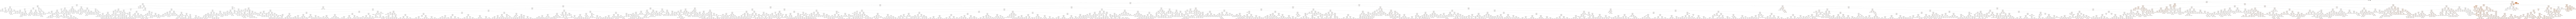

In [ ]:
dot_data = StringIO()  
export_graphviz(reg, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 